In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR

In [24]:
df = pd.read_pickle("dataframes/ex2_df_n_experts.pd")
df["gate"] = df["gate"].astype(str)
df

,dataset,n_features,train,test,train_std,test_std,n_experts,depth,gate
0,abalone,8,0.667034,0.664782,0.006382,0.018162,1,1,feature_importance_lda
1,abalone,8,0.682516,0.670723,0.009040,0.018826,1,2,feature_importance_lda
2,abalone,8,0.706233,0.695379,0.011626,0.015081,2,1,feature_importance_lda
3,abalone,8,0.734674,0.728323,0.007312,0.015946,2,2,feature_importance_lda
4,abalone,8,0.733509,0.722573,0.008157,0.024165,3,1,feature_importance_lda
...,...,...,...,...,...,...,...,...,...
475,students,11,0.754050,0.392499,0.019635,0.069197,8,2,None
476,students,11,0.732737,0.383789,0.025173,0.063440,9,1,None
477,students,11,0.769767,0.354325,0.022218,0.067063,9,2,None
478,students,11,0.742546,0.364891,0.024357,0.057518,10,1,None


In [25]:
#  ["abalone_input.pd","abalone_target.pd"], 
#  ["adult_input.pd","adult_target.pd"], # Large
#  ["banknote_input.pd","banknote_target.pd"], # Easy
#  ["bank_input.pd","bank_target.pd"], # Large
#  ["breast_cancer_input.np","breast_cancer_target.np"],
#  ["cars_input.pd","cars_target.pd"], 
#  ["contraceptive_input.pd","contraceptive_target.pd"], 
#  ["generated6_input.np","generated6_target.np"],
#  ["hrss_input.pd","hrss_target.pd"], # Large
#  ["iris_input.pd","iris_target.pd"],
#  ["steel_input.pd","steel_target.pd"],
#  ["students_input.pd","students_target.pd"],
#  #["sensorless_input.pd","sensorless_target.pd"], # Very Large dataset

#B97357 brown
#988ED5 violet

colormap = { 
    'iris_input.pd': "#8EBA42",
    'breast_cancer_input.np' : "#FBC15E" ,
    'cars_input.pd' : "#FBC15E",
    'abalone_input.pd': "#348ABD",
    'steel_input.pd': "#348ABD",
    'contraceptive_input.pd' : "#E24A33" ,
    'students_input.pd' : "#81D0DB",
    'banknote_input.pd' : "#81D0DB",
    'bank_input.pd' : "#B97357",
    'adult_input.pd' :"#E24A33",
    'hrss_input.pd' : "#8EBA42",   
    'generated6_input.np' : "grey",
}
datasets1 = [
            "banknote_input.pd", 
            "cars_input.pd", 
            "generated6_input.np",
            "hrss_input.pd",      
            "steel_input.pd",
            "contraceptive_input.pd", 

]
datasets2 = [           
            "iris_input.pd",
            "bank_input.pd",         
            "breast_cancer_input.np",          
            "adult_input.pd", 
            "abalone_input.pd", 
            "students_input.pd",
]

In [26]:
 df[(df.dataset ==  "iris") & (df.gate == "None") & (df.depth == 2)]

,dataset,n_features,train,test,train_std,test_std,n_experts,depth,gate
381,iris,4,0.963571,0.937376,0.007301,0.034262,1,2,None
383,iris,4,0.993335,0.947937,0.007897,0.034288,2,2,None
385,iris,4,0.995994,0.935917,0.004429,0.044422,3,2,None
387,iris,4,0.998226,0.942532,0.003548,0.033375,4,2,None
389,iris,4,0.998222,0.928058,0.003556,0.040608,5,2,None
391,iris,4,0.999554,0.933570,0.001946,0.048389,6,2,None
393,iris,4,0.996440,0.945341,0.004360,0.039035,7,2,None
395,iris,4,0.997329,0.936024,0.004080,0.037993,8,2,None
397,iris,4,0.998218,0.942532,0.003564,0.035282,9,2,None
399,iris,4,0.997333,0.930370,0.004956,0.048750,10,2,None


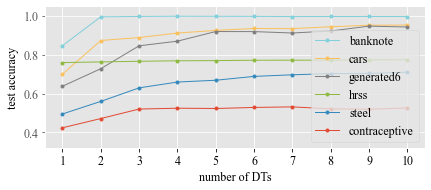

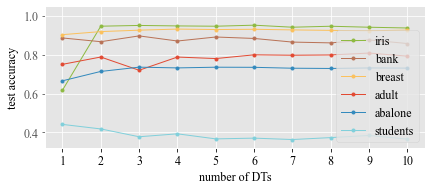

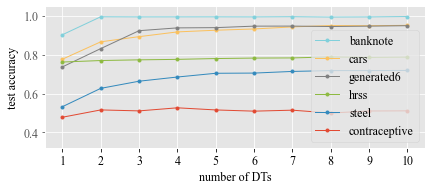

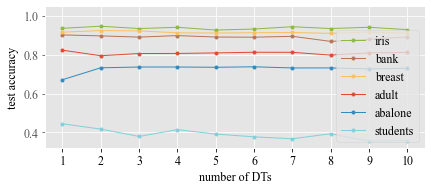

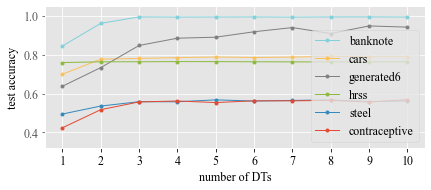

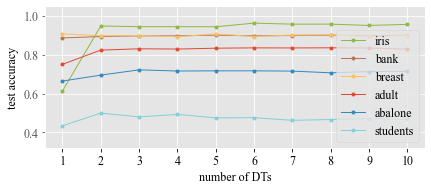

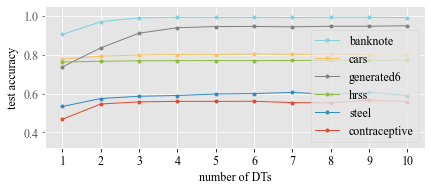

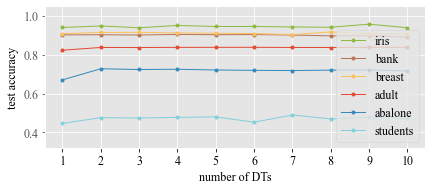

In [27]:
for gate in ["None","feature_importance_lda"]:
    for depth in [1,2]:
        first_set = True
        for datasets_chunk in [datasets1,datasets2]:
            if first_set:
                first_set = False
                chunk_name = "datasets1"
            else:
                chunk_name = "datasets2"
            for dataset in datasets_chunk:
                dataset_name = dataset.split("_")[0]

                slice1 = df[(df.dataset ==  dataset_name) & (df.gate == gate) & (df.depth == depth)]
                fig = plt.gcf()
                fig.set_size_inches(6.8, 2.6)
                plt.xticks(df.n_experts.unique())
                plt.ylabel("test accuracy", fontsize=12)
                plt.xlabel("number of DTs", fontsize=12)
                #plt.title(str(gate) + " " + str(depth))
                ax = plt.gca()
                ax.set_ylim(0.32,1.05) 
                plt.plot(slice1.n_experts,slice1.test,linewidth=1,linestyle='-',marker=".",color=colormap[dataset],label=dataset_name)
                ax.legend(loc="lower right")  
            plt.savefig("plots/n_experts_{}_{}_{}.pdf".format(gate,str(depth),chunk_name), bbox_inches="tight")
            plt.show()


In [28]:
colormap = {    
    1 : "#348ABD",
    2 : "#E24A33",
}

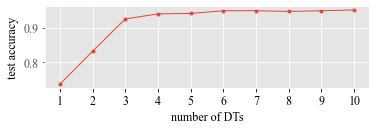

In [29]:
#Additional data set
for gate in ["None"]:
    for depth in [2]:
        dataset_name = "generated6"
        slice1 = df[(df.dataset ==  dataset_name) & (df.gate == gate) & (df.depth == depth)]
        fig = plt.gcf()
        fig.set_size_inches(5.8, 1.5)
        plt.xticks(df.n_experts.unique())
        plt.ylabel("test accuracy", fontsize=12)
        plt.xlabel("number of DTs", fontsize=12)
        #plt.title(str(gate) + " " + str(depth))
        ax = plt.gca()
        #ax.set_ylim([0.3,1])    
        plt.plot(slice1.n_experts,slice1.test,linewidth=1,linestyle='-',marker=".",color=colormap[depth])
        #ax.legend(loc="lower right")    
    plt.savefig("plots/n_experts_{}_{}_{}.pdf".format(gate,str(depth),"generated2"), bbox_inches="tight")
    plt.show()

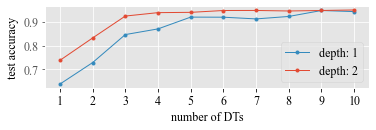

In [30]:
#Additional data set
for gate in ["None"]:
    for depth in [1,2]:
        dataset_name = "generated6"
        slice1 = df[(df.dataset ==  dataset_name) & (df.gate == gate) & (df.depth == depth)]
        fig = plt.gcf()
        fig.set_size_inches(5.8, 1.5)
        plt.xticks(df.n_experts.unique())
        plt.ylabel("test accuracy", fontsize=12)
        plt.xlabel("number of DTs", fontsize=12)
        #plt.title(str(gate) + " " + str(depth))
        ax = plt.gca()
        #ax.set_ylim([0.3,1])    
        plt.plot(slice1.n_experts,slice1.test,linewidth=1,linestyle='-',marker=".",color=colormap[depth],label= "depth: " + str(depth))
        ax.legend(loc="lower right")    
    plt.savefig("plots/n_experts_{}_{}_{}.pdf".format(gate,str(depth),"generated"), bbox_inches="tight")
    plt.show()

In [31]:
df[(df.dataset ==  "generated6") & (df.gate == "None") & (df.depth == 2)]

,dataset,n_features,train,test,train_std,test_std,n_experts,depth,gate
301,generated6,2,0.741053,0.73800,0.004424,0.011913,1,2,None
303,generated6,2,0.838453,0.83248,0.019101,0.016879,2,2,None
305,generated6,2,0.930907,0.92496,0.036675,0.036689,3,2,None
307,generated6,2,0.946413,0.93940,0.020740,0.022607,4,2,None
309,generated6,2,0.949133,0.94064,0.019317,0.019795,5,2,None
311,generated6,2,0.954080,0.94840,0.010970,0.014681,6,2,None
313,generated6,2,0.956560,0.94860,0.011213,0.010241,7,2,None
315,generated6,2,0.953800,0.94640,0.009651,0.008170,8,2,None
317,generated6,2,0.954213,0.94848,0.008775,0.009074,9,2,None
319,generated6,2,0.959880,0.95068,0.008818,0.011054,10,2,None
